In [121]:
# KNN Classification
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv(r'C:\Users\Kashi\Downloads\glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [123]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [124]:
df.shape

(214, 10)

In [125]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

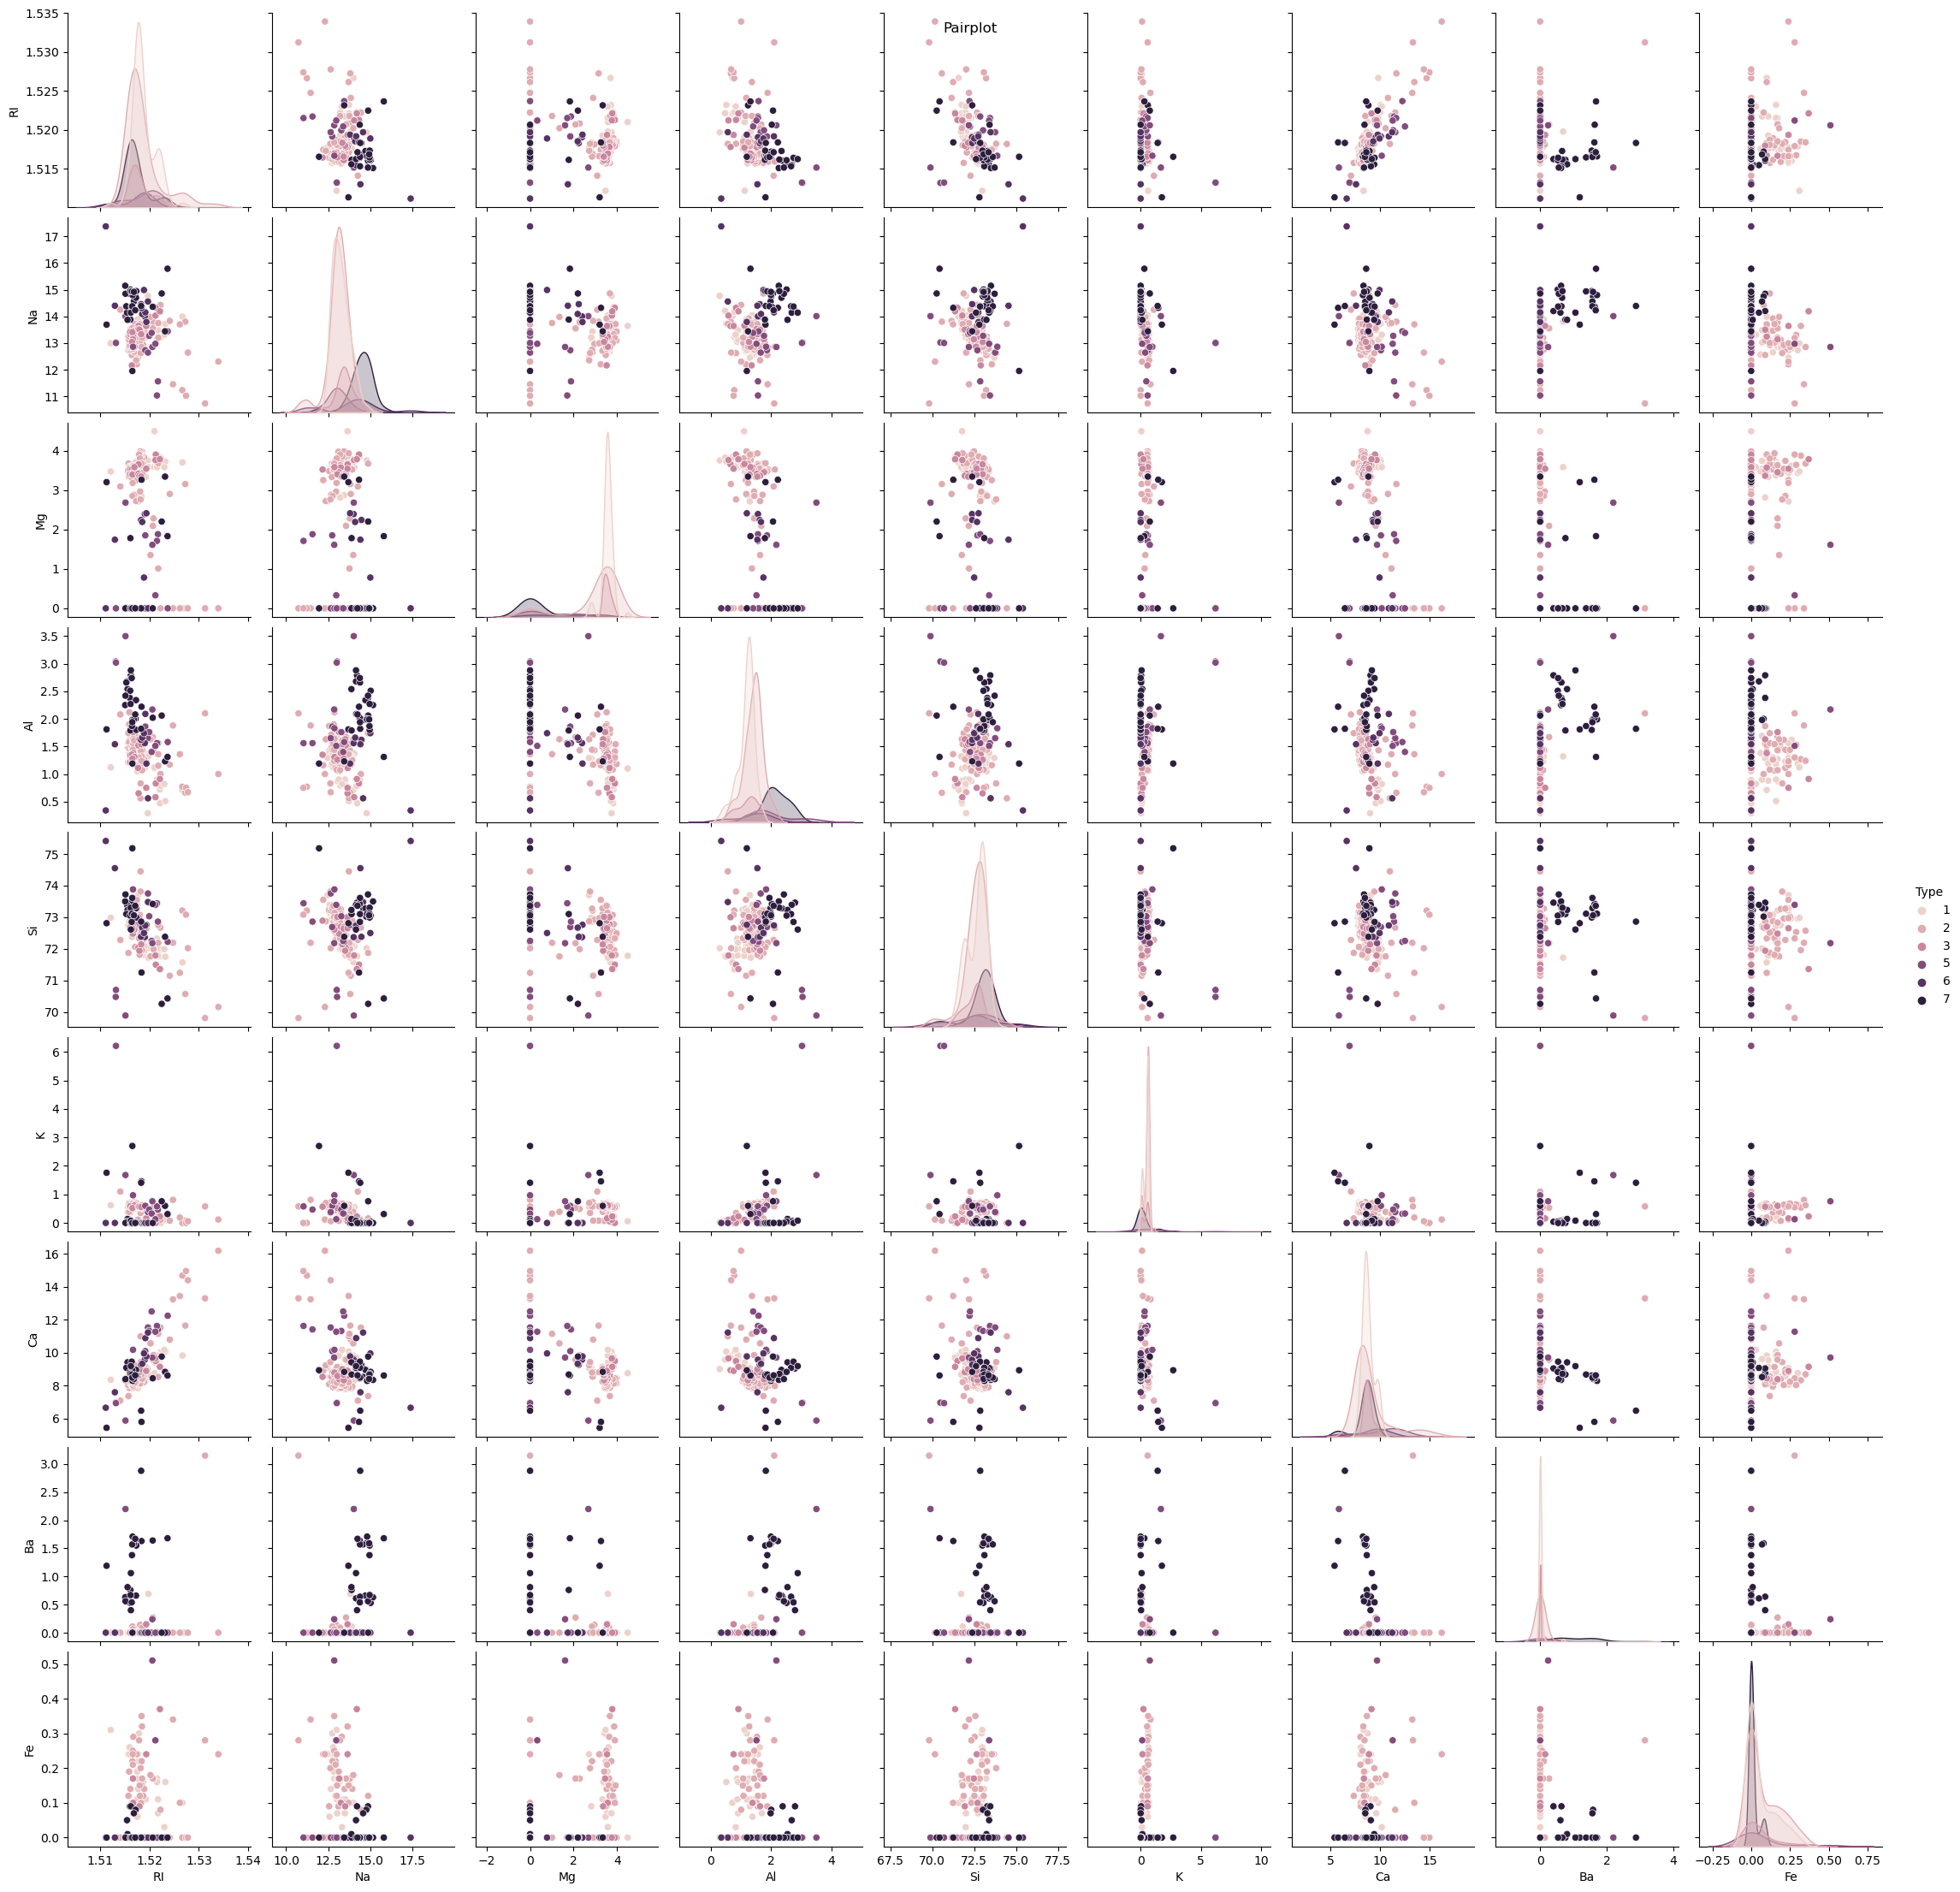

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
sns.pairplot(data=df, hue='Type', vars=features)
plt.suptitle('Pairplot')
plt.show()

<AxesSubplot:xlabel='RI'>

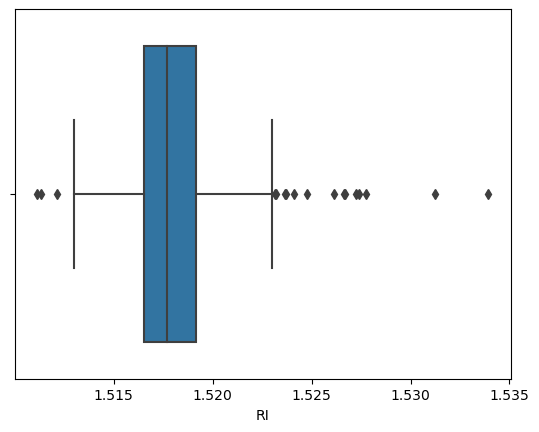

In [127]:
sns.boxplot(df['RI'])

<AxesSubplot:xlabel='Na'>

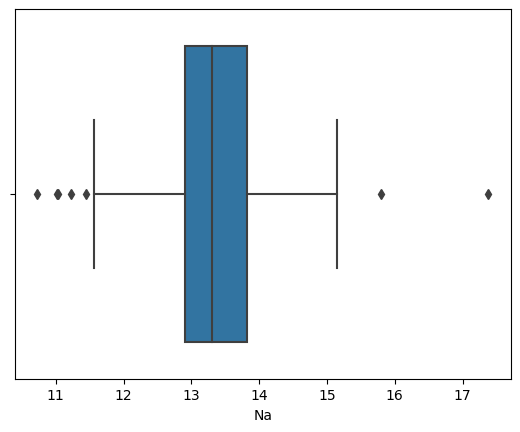

In [128]:
sns.boxplot(df['Na'])

<AxesSubplot:xlabel='Mg'>

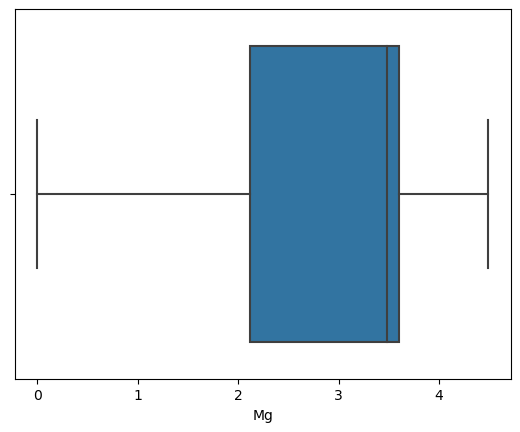

In [129]:
sns.boxplot(df['Mg'])

<AxesSubplot:xlabel='Al'>

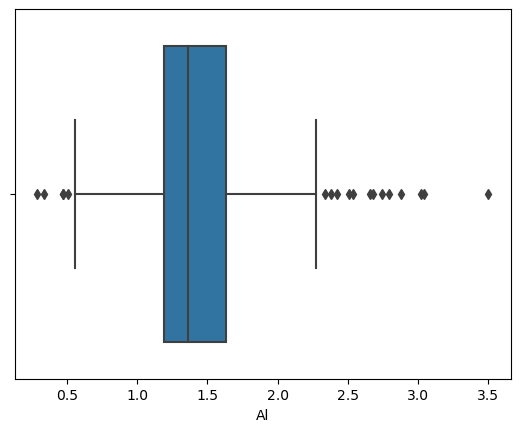

In [130]:
sns.boxplot(df['Al'])

<AxesSubplot:xlabel='Ca'>

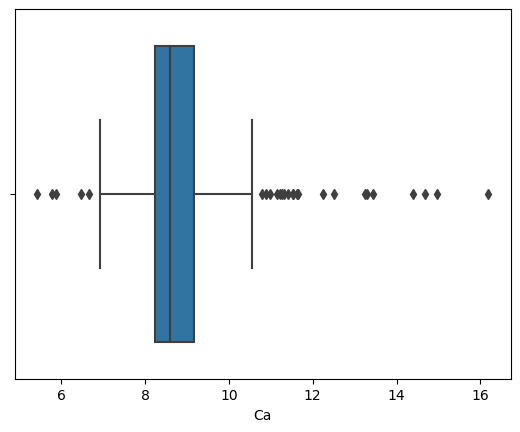

In [131]:
sns.boxplot(df['Ca'])

In [132]:
q3 = np.percentile(df["Na"],75)
q1 = np.percentile(df["Na"],25)

iqr = q3-q1

ub = q3+1.5*iqr
lb = q1-1.5*iqr

In [133]:
df[df["Na"]>ub]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0,6
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.0,7


In [134]:
df[df['Na']<lb]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
166,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00,5


In [135]:
df["Na"][df["Na"]>ub] = ub

In [136]:
df["Na"][df["Na"]<lb] = lb

<AxesSubplot:xlabel='Na'>

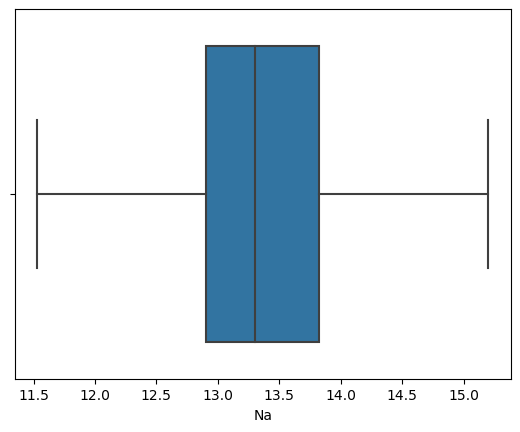

In [137]:
sns.boxplot(df['Na'])

In [138]:
q3 = np.percentile(df["Al"],75)
q1 = np.percentile(df["Al"],25)

iqr = q3-q1

ub = q3+1.5*iqr
lb = q1-1.5*iqr

In [139]:
df[df["Al"]>ub]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7
195,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,7
196,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01,7
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00,7
198,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7
199,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.00,7


<AxesSubplot:xlabel='Al'>

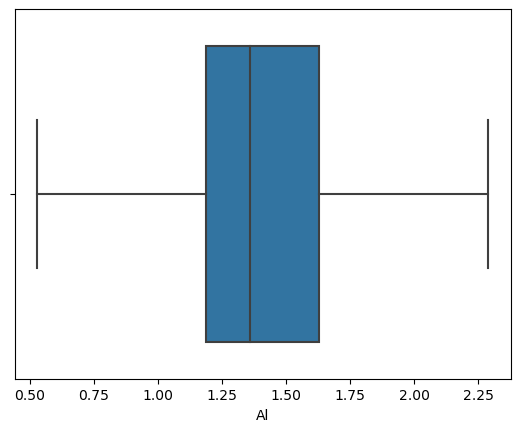

In [140]:
df["Al"][df["Al"]>ub] = ub
df["Al"][df["Al"]<lb] = lb
sns.boxplot(df['Al'])

In [141]:
q3 = np.percentile(df["Ca"],75)
q1 = np.percentile(df["Ca"],25)

iqr = q3-q1

ub = q3+1.5*iqr
lb = q1-1.5*iqr

<AxesSubplot:xlabel='Ca'>

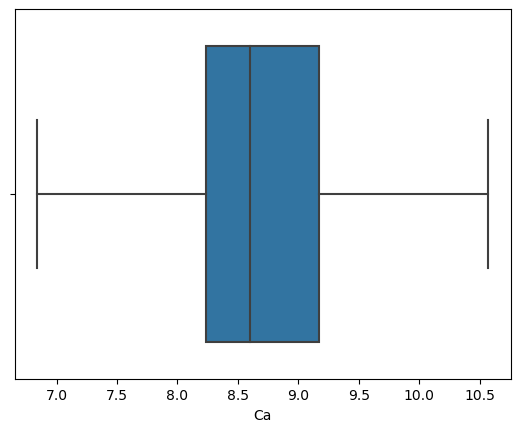

In [142]:
df["Ca"][df["Ca"]>ub] = ub
df["Ca"][df["Ca"]<lb] = lb
sns.boxplot(df['Ca'])

<AxesSubplot:xlabel='Ba'>

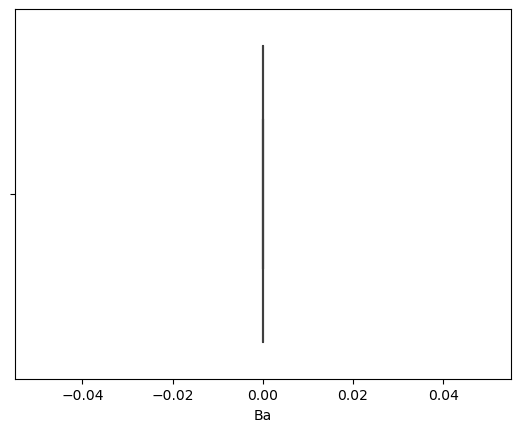

In [143]:
q3 = np.percentile(df["Ba"],75)
q1 = np.percentile(df["Ba"],25)

iqr = q3-q1

ub = q3+1.5*iqr
lb = q1-1.5*iqr
df["Ba"][df["Ba"]>ub] = ub
df["Ba"][df["Ba"]<lb] = lb
sns.boxplot(df['Ba'])

<AxesSubplot:xlabel='RI'>

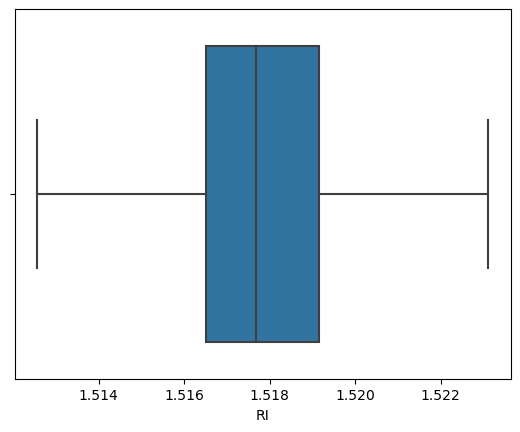

In [144]:
q3 = np.percentile(df["RI"],75)
q1 = np.percentile(df["RI"],25)

iqr = q3-q1

ub = q3+1.5*iqr
lb = q1-1.5*iqr
df["RI"][df["RI"]>ub] = ub
df["RI"][df["RI"]<lb] = lb
sns.boxplot(df['RI'])

<AxesSubplot:xlabel='K'>

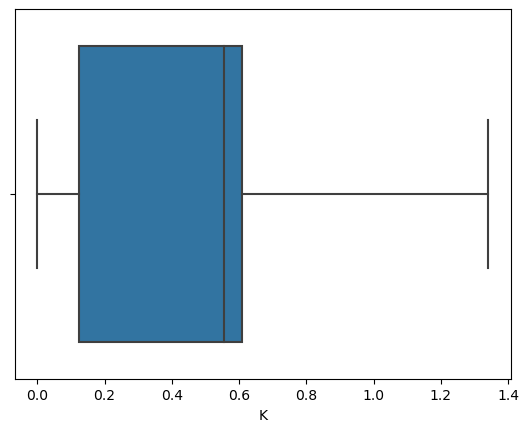

In [145]:
q3 = np.percentile(df["K"],75)
q1 = np.percentile(df["K"],25)

iqr = q3-q1

ub = q3+1.5*iqr
lb = q1-1.5*iqr
df["K"][df["K"]>ub] = ub
df["K"][df["K"]<lb] = lb
sns.boxplot(df['K'])

<AxesSubplot:xlabel='Fe'>

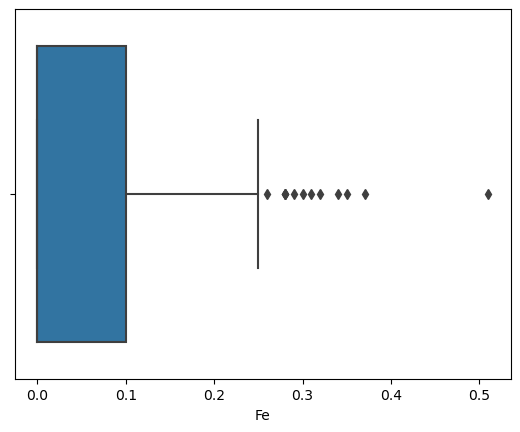

In [146]:
sns.boxplot(df['Fe'])

<AxesSubplot:xlabel='Fe'>

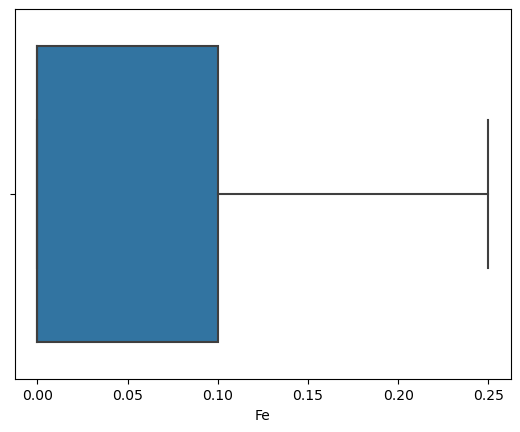

In [147]:
q3 = np.percentile(df["Fe"],75)
q1 = np.percentile(df["Fe"],25)

iqr = q3-q1

ub = q3+1.5*iqr
lb = q1-1.5*iqr
df["Fe"][df["Fe"]>ub] = ub
sns.boxplot(df['Fe'])

<AxesSubplot:xlabel='Si'>

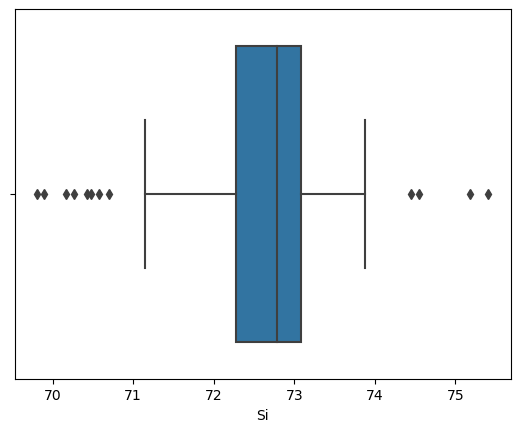

In [148]:
sns.boxplot(df['Si'])

<AxesSubplot:xlabel='Si'>

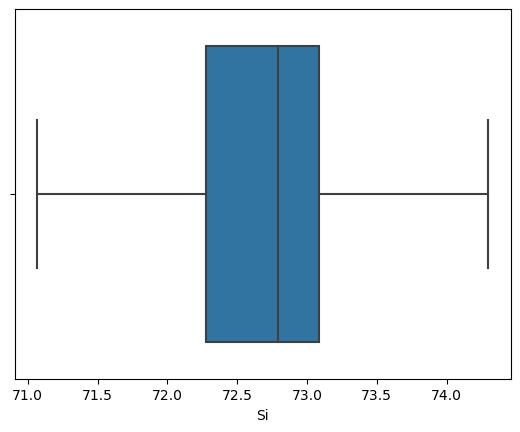

In [149]:
q3 = np.percentile(df["Si"],75)
q1 = np.percentile(df["Si"],25)

iqr = q3-q1

ub = q3+1.5*iqr
lb = q1-1.5*iqr
df["Si"][df["Si"]>ub] = ub
df["Si"][df["Si"]<lb] = lb
sns.boxplot(df['Si'])

In [150]:
x = df.iloc[:,0:9]
y = df.iloc[:,9]

In [151]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(x,y)

In [152]:
fit.n_features_

4

In [153]:
fit.ranking_

array([5, 1, 1, 1, 4, 1, 2, 6, 3])

In [154]:
d = {'f': x.columns, "v":fit.ranking_}
imp = pd.DataFrame(d)
imp.sort_values('v', ascending=True, inplace = True)
imp

,f,v
1,Na,1
2,Mg,1
3,Al,1
5,K,1
6,Ca,2
8,Fe,3
4,Si,4
0,RI,5
7,Ba,6


In [155]:
features_columns = ['Na', 'Mg', 'Al', 'K']

# Create X (features) and y (target variable)
X = df[features_columns]
y = df['Type']

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [173]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [174]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [175]:
ypred = knn.predict(x_test)

In [176]:
accuracy = accuracy_score(y_test, ypred)
accuracy

0.6744186046511628

In [177]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [178]:
    param_grid = {'n_neighbors': range(1, 21)}

In [179]:
grid= GridSearchCV(knn, param_grid, cv= 10)

In [180]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [181]:
print(grid.best_score_)
print(grid.best_params_)

0.6614379084967321
{'n_neighbors': 5}


In [182]:
knn1 = KNeighborsClassifier(n_neighbors = 3)

In [183]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [184]:
ypred1 = knn1.predict(x_test)
ypred1

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 2, 5, 1, 2, 6, 5, 6, 1, 3, 7, 2, 7,
       7, 7, 1, 1, 1, 1, 5, 1, 2, 2, 3, 2, 1, 7, 5, 3, 1, 7, 2, 7, 3],
      dtype=int64)

In [185]:
accuracy1 = accuracy_score(y_test, ypred1)
accuracy1

0.7209302325581395

In [186]:
y_test


9      1
197    7
66     1
191    7
117    2
111    2
15     1
86     2
75     2
144    2
182    6
170    5
141    2
73     2
178    6
167    5
190    7
18     1
45     1
184    6
98     2
209    7
211    7
195    7
148    3
104    2
30     1
25     1
175    5
16     1
55     1
138    2
158    3
93     2
69     1
203    7
171    5
152    3
97     2
84     2
101    2
200    7
60     1
Name: Type, dtype: int64